In [140]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style

%matplotlib inline

* A good	way	to	reduce	overfitting	is	to	regularize	the	model
	the	fewer	degrees	of	freedom	it	has,	the	harder	it	will	be	for	it	to overfit	the	data.
* A simple	way	to	regularize	a	polynomial	model	is	to	reduce the	number	of	polynomial	degrees.

# Ridge regression

* Ridge	Regression	(also	called	Tikhonov	regularization)	is	a	regularized	version	of	Linear Regression.
* A	regularization	term	equal	to	$ \sum_{i=1}^{n} θ_{i}^2$ is	added	to	the	cost	function.
* This forces	the	learning	algorithm	to	not	only	fit	the	data	but	also	keep	the	model	weights	as small	as	possible.
* Note	that	the	regularization	term	should	only	be	added	to	the	cost function	during	training.	
* Once	the	model	is	trained,	we	want	to	evaluate	the	model’s performance	using	the	unregularized	performance	measure.
* The	hyperparameter	α	controls	how	much	you	want	to	regularize	the	model.
* If	α	=	0	then Ridge	Regression	is	just	Linear	Regression.	
* If	α	is	very	large,	then	all	weights	end	up	very close	to	zero	and	the	result	is	a	flat	line	going	through	the	data’s	mean.
* Ridge	Regression	cost	function  $$ J(θ) = MSE(θ)+ \alpha \frac{1}{2}\sum_{i=1}^{n} θ_{i}^2 $$
  *  the	bias	term	$ θ_{0}$ 	is	not	regularized
  * 	If	we	define	w as	the	vector	of	feature	weights	($θ_{0}$ 	to	$θ_{n}$ ),	then	the	regularization	term	is	simply	equal	to $\frac{1}{2}(∥	w	∥_{2}  )^ 2$  ,	where	$ ∥	·	∥_{2} $	represents	the	$l_{2}$ 	norm	of	the	weight	vector.
* It	is	important	to	scale	the	data	before	performing	Ridge	Regression,	as	it	is sensitive	to	the	scale	of	the	input	features.

In [141]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [142]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

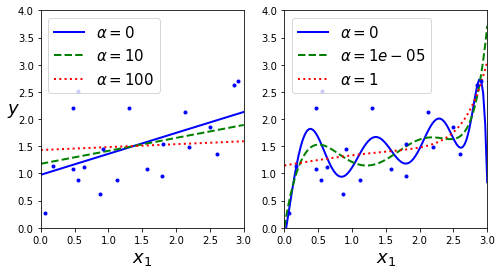

In [143]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

* several	Ridge	models	trained	on	some	linear	data	using	different	α values is shoen in the above figure.
* On	the	left,	plain	Ridge	models	are	used,	leading	to	linear	predictions.
* On	the	right, the	data	is	first	expanded	using	 PolynomialFeatures(degree=10) ,	then	it	is	scaled	using a	 StandardScaler ,	and	finally	the	Ridge	models	are	applied	to	the	resulting	features:	this is	Polynomial	Regression	with	Ridge	regularization.	
* Note	that	"increasing	the α	value leads	to	flatter	predictions";	this	reduces	the	model’s	variance	but increases	its	bias.

* As	with	Linear	Regression,	we	can	perform	Ridge	Regression	either	by	computing	a closed-form	equation	or	by	performing	Gradient	Descent.
* Ridge regression closed form solution $$ \hat{θ}=(X^T X+\alpha A)^-1 X^T y$$

# Using Scikit-Learn

In [144]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 1.55071465]])

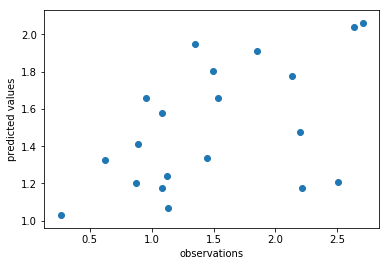

In [145]:
a=ridge_reg.predict(X)
plt.scatter(y, a)
plt.xlabel('observations')
plt.ylabel('predicted values')

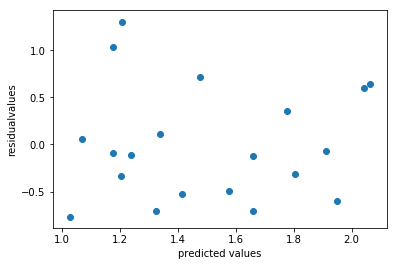

In [146]:
b = y-ridge_reg.predict(X)
plt.scatter(a, b)
plt.xlabel('predicted values')
plt.ylabel('residualvalues')

In [147]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([ 1.13500145])

* The	 penalty 	hyperparameter	sets	the	type	of	regularization	term	to	use.	
* Specifying	 "l2" indicates	that	you	want	SGD	to	add	a	regularization	term	to	the	cost	function	equal	to	half the	square	of	the	$l_{2}$ 	norm	of	the	weight	vector:	this	is	simply	$Ridge$	$Regression$.

# Lasso	Regression

* Least	Absolute	Shrinkage	and	Selection	Operator	Regression(	Lasso) 	is	another	regularized	version	of	Linear	Regression.
* Just like ridge Regression,	it	adds	a	regularization	term	to	the	cost	function,	but	it	uses	the	$l_{1}$ 	norm	of	the weight	vector	instead	of	half	the	square	of	the	$l_{2}$ 	norm.
* Lasso	Regression	cost	function :  $$ J(θ) = MSE(θ)+ \alpha \sum_{i=1}^{n} |θ_{i}| $$

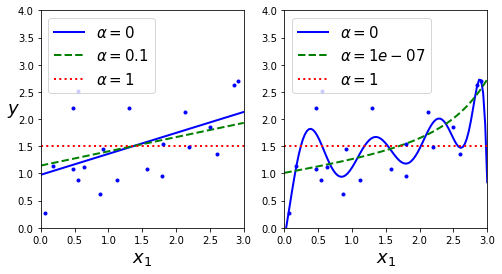

In [148]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)
plt.show()

* An	important	characteristic	of	Lasso	Regression	is	that	it	tends	to	completely	eliminate	the weights	of	the	least	important	features.
* For	example,	the	dashed	line in	the	right	plot	on	the above figure(with	α	=	$10^-7$)	looks	quadratic,	almost	linear:	all	the weights	for	the	high-degree	polynomial	features	are	equal	to	zero.
* In other words Lasso Regression	automatically	performs	feature	selection	and	outputs	a	sparse	model.

In [149]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([ 1.53788174])

# Elastic	Net

* Elastic	Net	is	a	middle	ground	between	Ridge	Regression	and	Lasso	Regression.
* Regularization	term	is	a	simple	mix	of	both	Ridge	and	Lasso’s	regularization	terms,	and you	can	control	the	mix	ratio	r.	
* When	r	=	0,	Elastic	Net	is	equivalent	to	Ridge	Regression. 
* when	r	=	1,	it	is	equivalent	to	Lasso	Regression.
* Elastic Net cost function : $$ J(θ) = MSE(θ)+r\alpha \sum_{i=1}^{n} |θ_{i}|+\frac{1-r}{2}\alpha \sum_{i=1}^{n} θ_{i}^2$$

* when	should	you	use	Linear	Regression,	Ridge,	Lasso,	or	Elastic	Net?
   * It	is	almost always	preferable	to	have	at	least	a	little	bit	of	regularization,	so	generally	you	should avoid	plain	Linear	Regression.
   * Ridge	is	a	good	default,	but	if	we	suspect	that	only	a	few features	are	actually	useful,	you	should	prefer	Lasso	or	Elastic	Net	since	they	tend	to reduce	the	useless	features’	weights	down	to	zero.
   * In	general,	Elastic Net	is	preferred	over	Lasso	since	Lasso	may	behave	erratically	when	the	number	of features	is	greater	than	the	number	of	training	instances	or	when	several	features	are strongly	correlated.

In [41]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([ 1.54333232])

# Early	Stopping

* A	very	different	way	to	regularize	iterative	learning	algorithms	such	as	Gradient	Descent
 	to	stop	training	as	soon	as	the	validation	error	reaches	a	minimum.	This	is	called	"early stopping".
* Below figure shows	a	complex	model	being	trained	using	Batch	Gradient	Descent.	
* As	the	epochs	go	by,	the algorithm	learns	and	its	prediction	error	(RMSE)	on	the	training	set	naturally	goes	down, and	so	does	its	prediction	error	on	the	validation	set.	
* However,	after	a	while	the	validation error	stops	decreasing	and	actually	starts	to	go	back	up.	
* This	indicates	that	the	model	has started	to	overfit	the	training	data.	
* With	early	stopping	you	just	stop	training	as	soon	as	the validation	error	reaches	the	minimum.	
* It	is	such	a	simple	and	efficient	regularization technique	that	Geoffrey	Hinton	called	it	a	“beautiful	free	lunch.”

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

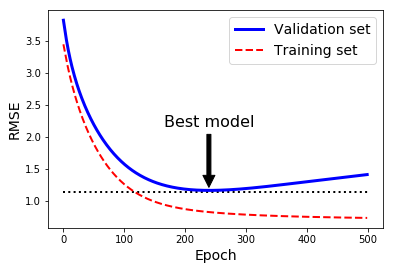

In [52]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train_predict, y_train))
    val_errors.append(mean_squared_error(y_val_predict, y_val))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

* As the epochs increasing the prediction error of  both training set  and validation set decreases upto some value and after	a	while	the	validation error	stops	decreasing	and	actually	starts	to	go	back up.

In [53]:
from sklearn.base import clone
sgd_reg = SGDRegressor(warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) 
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [54]:
best_epoch, best_model

(706, SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
        fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
        loss='squared_loss', n_iter=5, penalty=None, power_t=0.25,
        random_state=42, shuffle=True, verbose=0, warm_start=True))

# Logistic	Regression

* Logistic	Regression	(also	called	Logit	Regression)	is	commonly used	to	estimate	the	probability	that	an	instance	belongs	to	a	particular	class.
* 	If	the	estimated	probability	is	greater	than	50%,then	the	model	predicts	that	the	instance	belongs	to	that	class or	else	it	predicts	that	it	does	not	.This	makes	it	a	binary	classifier.


# Estimating	Probabilities

* like	a	Linear	Regression	model,	a	Logistic	Regression	model computes	a	weighted	sum	of	the	input	features,	but	instead	of	outputting the	result	directly	like	the	Linear	Regression	model	does,	it	outputs	the	logistic	of	this result.
* Logistic	Regression	model	estimated	probability	(vectorized	form) $$ \hat{p} = h_{θ}(x)=\sigma(θ^T x)$$


* The	logistic	—	also	called	the	logit,	noted	σ(·)	—	is	a	sigmoid	function	(i.e.,	S-shaped)	that outputs	a	number	between	0	and	1 defined in the below equation.
* Logistic	function : $$ \sigma(t)= 1/(1 + exp(-t)   $$
* Logistic	Regression	model	prediction: $ \hat{y}$=0 if $\hat{p}$ < 0.5 else$ \hat{y}$ = 1 if  $\hat{p} $>= 0.5 

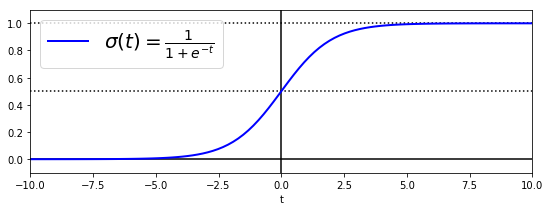

In [14]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

* Notice	that	σ(t)	<	0.5	when	t	<	0,	and	σ(t)	≥	0.5	when	t	≥	0,	so	a	Logistic	Regression model	predicts	1	if	$θ^T$ 	·	x	is	positive,	and	0	if	it	is	negative.

# Training	and	Cost	Function

* The	objective	of	training	is	to	set	the	parameter	vector	θ so	that	the	model	estimates	high	probabilities	for	positive	instances	(y	=	1)	and	low probabilities	for	negative	instances	(y	=	0).	
  * $ C(\theta) = -log(\hat{p}) if y=1 else -log(1-\hat{p}) if y = 0 $
* This	cost	function	makes	sense	because	–	log(t)	grows	very	large	when	t	approaches 0.
* So the	cost	will	be	large	if	the	model	estimates	a	probability	close	to	0	for	a	positive	instance.
* And	it	will	also	be	very	large	if	the	model	estimates	a	probability	close	to	1	for	a	negative  instance.
* 	On	the	other	hand,	–	log(t)	is	close	to	0	when	t	is	close	to	1,	so	the	cost	will	be close	to	0	if	the	estimated	probability	is	close	to	0	for	a	negative	instance	or	close	to	1	for a	positive	instance,	which	is	precisely	what	we	want.
* a	positive	instance,	which	is	precisely	what	we	want.
* The	cost	function	over	the	whole	training	set	is	simply	the	average	cost	over	all	training instances.	It	can	be	written	in	a	single	expression	(as	you	can	verify	easily),	called	the	log loss.
* Logistic	Regression	cost	function(Log loss):$$ J(\theta)= \frac{-1}{m}\sum_{i=1}^{m}[y^(i)log(\hat{p}^(i)+(1-y^(i))log(1-p^(i))]$$
* There	is	no	known	closed-form	equation	to	compute	the	value	of	θ that	minimizes	this	cost	function.
* But	the	cost	function	is	convex,	so	Gradient	Descent		is	guaranteed	to	find	the	global	minimum.

# Decision Boundaries

In [15]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, 3:]  
y = (iris["target"] == 2).astype(np.int)  

In [16]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
log_reg.predict([[1.7],	[1.5]])

array([1, 0])

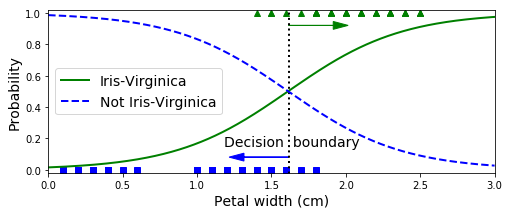

In [19]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

* Notice	that	there	is	a	bit	of	overlap.	
* Above	about	2cm	the	classifier	is	highly	confident	that	the	flower	is	an	Iris-Virginica.		
*  while	below	1	cm	it	is	highly	confident	that	it	is	not	an	Iris- Virginica.
* In	between	these	extremes, the	classifier	is	unsure.	
* However,	if	you	ask	it	to	predict	the	class	it	will	return	whichever	class	is	the most	likely.	
* Therefore,	there	is	a	decision	boundary	at	around	1.6	cm	where	both probabilities	are	equal	to	50%:	if	the	petal	width	is	higher	than	1.6	cm,	the	classifier	will predict	that	the	flower	is	an	Iris-Virginica,	or	else	it	will	predict	that	it	is	not

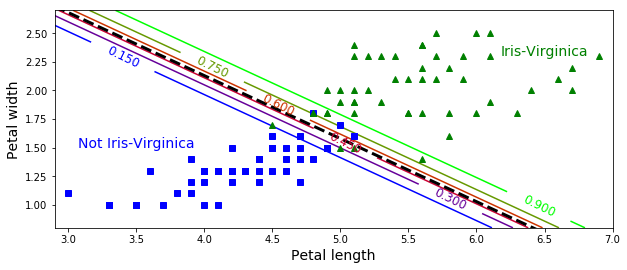

In [20]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

* This plot displays only 	two	features:	petal	width	and length.	
* Once	trained,	the	Logistic	Regression	classifier	can	estimate	the	probability	that	a new	flower	is	an	Iris-Virginica	based	on	these	two	features.	
* The	dashed	line	represents	the points	where	the	model	estimates	a	50%	probability:	this	is	the	model’s	decision	boundary.
* Note	that	it	is	a	linear	boundary.
* Each	parallel	line	represents	the	points	where	the	modeloutputs	a	specific	probability,	from	15%	(bottom	left)	to	90%	(top	right).	
* All	the	flowers beyond	the	top-right	line	have	an	over	90%	chance	of	being	Iris-Virginica	according	to	the model.

# Softmax	Regression

* The	Logistic	Regression	model	can	be	generalized	to	support	multiple	classes	directly, without	having	to	train	and	combine	multiple	binary	classifiers	.This	is	called	Softmax	Regression,	or	Multinomial	Logistic	Regression.
* when	given	an	instance	x,	the	Softmax	Regression	model	first computes	a	score	s k (x)	for	each	class	k,	then	estimates	the	probability	of	each	class	by applying	the	softmax	function 	to	the	scores.
* softmax score for class k: $$ S_{k}(X) = \theta_{k}^T X $$
  * 	each	class	has	its	own	dedicated	parameter	vector	θ k .	All	these	vectors	are typically	stored	as	rows	in	a	parameter	matrix	.
* Once	you	have	computed	the	score	of	every	class	for	the	instance	x,	you	can	estimate	the
 probability	 k 	that	the	instance	belongs	to	class	k	by	running	the	scores	through	the softmax	function,it	computes	the	exponential	of	every	score,	then normalizes	them. 
 * Softmax function : $$ P^k = \sigma(S(X))_{k} =  \frac{\exp(S_{k}(X))}{\sum_{j=1}^{k}\exp(S_{j}(X)} $$.
  * K	is	the	number	of	classes.
  * s(x)	is	a	vector	containing	the	scores	of	each	class	for	the	instance	x.
  * σ(s(x)) k 	is	the	estimated	probability	that	the	instance	x	belongs	to	class	k	given	thescores	of	each	class	for	that	instance.
* Just	like	the	Logistic	Regression	classifier,	the	Softmax	Regression	classifier	predicts	the class	with	the	highest	estimated	probability,as shown in the below equation.
    * Softmax	Regression	classifier	prediction : $$ \hat{Y} = argmax\sigma(S(X))_{k}=argmaxS_{k}(x)=argmax(\theta_{k}^T X) $$
    * The	argmax	operator	returns	the	value	of	a	variable	that	maximizes	a	function.	In	this equation,	it	returns	the	value	of	k	that	maximizes	the	estimated	probability	$ \sigma(S(X))_{k} $.
* 	The	objective	is	to	have	a	model	that	estimates	a	high	probability for	the	target	class.
* Cross	entropy	is	frequently	used	to	measure	how	well	a	set	of	estimated	class probabilities	match	the	target	classes.
   * Cross	entropy	cost	function : $$ J(Θ) = \frac{-1}{m}\sum_{i=1}^{m} \sum_{k=1}^{k}y_{k}^(i)log(\hat{p}_{k}^(i))$$
   * $ \hat{y}_{k}^(i)$ 	is	equal	to	1	if	the	target	class	for	the	i th 	instance	is	k;	otherwise,	it	is	equal	to	0.
   * 	when	there	are	just	two	classes	(K	=	2),	this	cost	function	is	equivalent	to	the Logistic	Regression’s	cost	function.

In [22]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

* If you	want to find	an	iris	with	5	cm	long	and	2	cm	wide	petals,	you	can	ask	your model	to	tell	you	what	type	of	iris	it	is,	and	it	will	answer	Iris-Virginica	(class	2)	with 94.2%	probability or it will be Iris-Versicolor	with	5.8%	probability.

In [23]:
softmax_reg.predict([[5,2]])

array([2])

In [24]:
softmax_reg.predict_proba([[5,2]])

array([[  6.33134078e-07,   5.75276067e-02,   9.42471760e-01]])

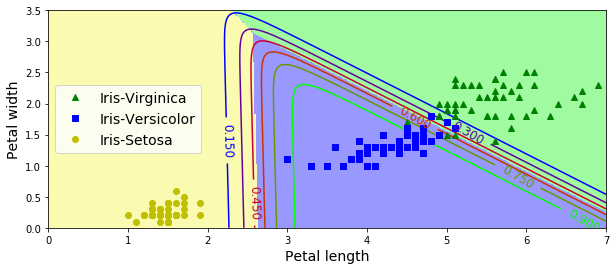

In [30]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

* 	Above figure shows	the	resulting	decision	boundaries,	represented	by	the	background colors.	
* Notice	that	the	decision	boundaries	between	any	two	classes	are	linear.	
* The	figure also	shows	the	probabilities	for	the	Iris-Versicolor	class,	represented	by	the	curved	lines.
* Notice	that	the model	can	predict	a	class	that	has	an	estimated	probability	below	50%.
* For	example,	at	the point	where	all	decision	boundaries	meet,	all	classes	have	an	equal	estimated	probability of	33%.